<a href="https://colab.research.google.com/github/KumuthuA/ml-project/blob/main/layer_7_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score, classification_report
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from google.colab import drive

In [ ]:
global labels
global features
labels = [f"label_{i+1}" for i in range(4)]
features = [f'feature_{i+1}' for i in range(768)]
label_1 = labels[0]
label_2 = labels[1]
label_3 = labels[2]
label_4 = labels[3]

In [ ]:
MOUNT_PATH='/content/drive'
drive.mount(MOUNT_PATH)
WORKING_DIR=f"{MOUNT_PATH}/MyDrive/ML/ML project/Layer 7"
train = pd.read_csv(f"{WORKING_DIR}/layer_7_train.csv")
valid = pd.read_csv(f"{WORKING_DIR}/layer_7_valid.csv")
test = pd.read_csv(f"{WORKING_DIR}/layer_7_test.csv")

Mounted at /content/drive


# Defining functions

In [ ]:
def data_preprocess(train_df, valid_df, test_df, label):
    scaler = StandardScaler()

    X_train = pd.DataFrame(scaler.fit_transform(train_df.drop(labels, axis=1)), columns=features)
    y_train = train_df[label]

    X_valid = pd.DataFrame(scaler.transform(valid_df.drop(labels, axis=1)), columns=features)
    y_valid = valid_df[label]

    X_test = pd.DataFrame(scaler.transform(test_df.drop(labels, axis=1)), columns=features)
    y_test = test_df[label]
    return X_train, y_train, X_valid, y_valid, X_test, y_test

In [ ]:
def feature_engineering_with_pca(X_train, X_valid, X_test, n_components):

    # Apply PCA for dimensionality reduction
    pca = PCA(n_components)

    # Create a new DataFrame with the PCA-transformed features
    X_train_pca = pca.fit_transform(X_train)
    X_train_df_pca = pd.DataFrame(X_train_pca)
    X_valid_df_pca = pd.DataFrame(pca.transform(X_valid))
    X_test_df_pca = pd.DataFrame(pca.transform(X_test))
    print("Shape for label4 train set:", X_train_df_pca.shape)
    print("Shape for label4 validation set:", X_valid_df_pca.shape)
    print("Shape for label4 validation set:", X_test_df_pca.shape)

    return X_train_df_pca, X_valid_df_pca, X_test_df_pca

In [ ]:
def build_knn_model(X_train, y_train, n_neighbors):
    # Create and train your KNN classifier model
    # You can perform hyperparameter tuning by changing the value of 'n_neighbors'
    knn = KNeighborsClassifier(n_neighbors)
    knn.fit(X_train, y_train)
    return knn

In [ ]:
def build_svc_model(X_train, y_train):
    svc_model = SVC(kernel='linear', gamma='scale')
    svc_model.fit(X_train, y_train)
    return svc_model

In [ ]:
def evaluate(y_valid, y_pred):
    print(f"Accuracy: {accuracy_score(y_valid, y_pred)}")
    print(f"F1 Score: {f1_score(y_valid, y_pred, average='weighted')}")
    print(f"Precision: {precision_score(y_valid, y_pred, average='weighted')}")
    print(f"Recall: {recall_score(y_valid, y_pred, average='weighted')}")

# Label 04

In [ ]:
X_train_4, y_train_4, X_valid_4, y_valid_4, X_test_4, y_test_4 = data_preprocess(train, valid, test, label_4)
y_train_4.info()

<class 'pandas.core.series.Series'>
RangeIndex: 28520 entries, 0 to 28519
Series name: label_4
Non-Null Count  Dtype
--------------  -----
28520 non-null  int64
dtypes: int64(1)
memory usage: 222.9 KB


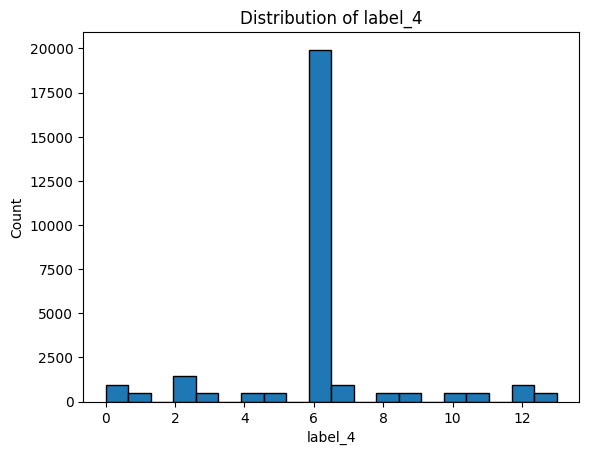

In [ ]:
plt.hist(y_train_4, bins=20, edgecolor='k')
plt.xlabel(label_4)
plt.ylabel('Count')
plt.title(f'Distribution of {label_4}')
plt.show()

# Cross validation

In [ ]:
svc_model = SVC()
knn_model = KNeighborsClassifier(n_neighbors=5)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

num_folds = 5

kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)

svc_scores = cross_val_score(svc_model, X_train_4, y_train_4, cv=kfold)
print("SVC Cross-Validation Scores:")
for i, score in enumerate(svc_scores):
    print(f"Fold {i+1} - Accuracy: {score:.2f}")
svc_mean_accuracy = svc_scores.mean()
print(f"Mean Accuracy (SVC): {svc_mean_accuracy:.2f}")

knn_scores = cross_val_score(knn_model, X_train_4, y_train_4, cv=kfold)
print("\nKNN Cross-Validation Scores:")
for i, score in enumerate(knn_scores):
    print(f"Fold {i+1} - Accuracy: {score:.2f}")
knn_mean_accuracy = knn_scores.mean()
print(f"Mean Accuracy (KNN): {knn_mean_accuracy:.2f}")

rf_scores = cross_val_score(rf_model, X_train_4, y_train_4, cv=kfold)
print("Random Forest Cross-Validation Scores:")
for i, score in enumerate(rf_scores):
    print(f"Fold {i+1} - Accuracy: {score:.2f}")
rf_mean_accuracy = rf_scores.mean()
print(f"Mean Accuracy (Random Forest): {rf_mean_accuracy:.2f}")

In [ ]:
model_4_before = build_knn_model(X_train_4, y_train_4, 5)

y_pred_4_before = model_4_before.predict(X_valid_4)

evaluate(y_valid_4, y_pred_4_before)

Accuracy: 0.9293333333333333
F1 Score: 0.9254701844050116
Precision: 0.9325152959025916
Recall: 0.9293333333333333


# Resampling

In [ ]:
resampler = RandomOverSampler(sampling_strategy='auto')
X_train_4_resampled, y_train_4_resampled = resampler.fit_resample(X_train_4, y_train_4)

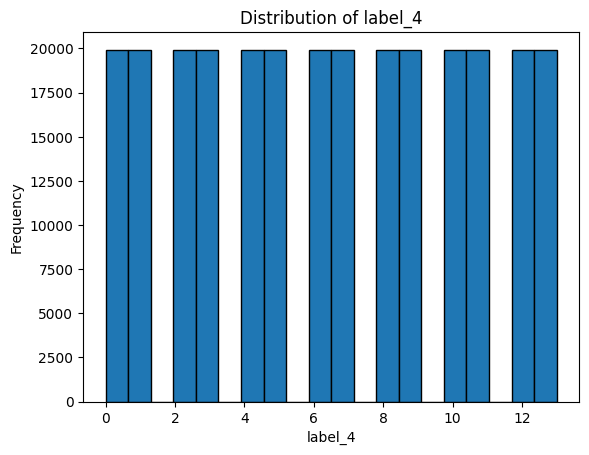

In [ ]:
plt.hist(y_train_4_resampled, bins=20, edgecolor='k')
plt.xlabel(label_4)
plt.ylabel('Frequency')
plt.title(f'Distribution of {label_4}')
plt.show()

In [ ]:
model_4_oversampling = build_knn_model(X_train_4_resampled, y_train_4_resampled, 5)

y_pred_4_oversampling = model_4_oversampling.predict(X_valid_4)

evaluate(y_valid_4, y_pred_4_oversampling)

Accuracy: 0.9226666666666666
F1 Score: 0.9260721707438796
Precision: 0.9362365893711394
Recall: 0.9226666666666666


In [ ]:
model_4_oversampling_svc = SVC()
model_4_oversampling_svc.fit(X_train_4_resampled, y_train_4_resampled)

y_pred_4_oversampling_svc = model_4_oversampling_svc.predict(X_valid_4)

evaluate(y_valid_4, y_pred_4_oversampling_svc)

# Feature reduction using PCA

In [ ]:
selector = SelectKBest(f_classif, k=250)
X_train_4_new = selector.fit_transform(X_train_4_resampled, y_train_4_resampled)
X_valid_4_new = selector.transform(X_valid_4)
X_test_4_new = selector.transform(X_test_4)

In [ ]:
X_train_4_pca, X_valid_4_pca, X_test_4_pca = feature_engineering_with_pca(X_train_4_new, X_valid_4_new, X_test_4_new, n_components=0.95)

Shape for label4 train set: (279132, 147)
Shape for label4 validation set: (750, 147)
Shape for label4 validation set: (750, 147)


In [ ]:
model_4_knn = build_knn_model(X_train_4_pca, y_train_4_resampled, 5)

y_pred_4_knn = model_4_knn.predict(X_valid_4_pca)

evaluate(y_valid_4, y_pred_4_knn)

Accuracy: 0.9386666666666666
F1 Score: 0.9403397853682534
Precision: 0.9449194266375851
Recall: 0.9386666666666666


In [ ]:
model_4_svc = SVC()
model_4_svc.fit(X_train_4_pca, y_train_4_resampled)

y_pred_4_svc = model_4_svc.predict(X_valid_4_pca)

evaluate(y_valid_4, y_pred_4_svc)

Accuracy: 0.9706666666666667
F1 Score: 0.9704176503532105
Precision: 0.9718795039951758
Recall: 0.9706666666666667


# Hyperparameter Tuning for label 4

In [ ]:
param_grid_4 = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance']
}

model_4_knn = KNeighborsClassifier()

grid_search_4 = GridSearchCV(estimator=model_4_knn, param_grid=param_grid_4, cv=5, verbose=3, n_jobs=-1, scoring='accuracy')

grid_search_4.fit(X_train_4_pca, y_train_4_resampled)

best_params_4 = grid_search_4.best_params_
best_model_4 = grid_search_4.best_estimator_

valid_accuracy_4 = best_model_4.score(X_valid_4_pca, y_valid_4)

# Print the best hyperparameters and test accuracy
print("Best Hyperparameters:", best_params_4)
print("Test Accuracy:", valid_accuracy_4)

In [ ]:
param_grid_4_svc = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['rbf']
}

model_4_svc = SVC()

grid_search_4_svc = GridSearchCV(estimator=model_4_svc, param_grid=param_grid_4_svc, cv=5, verbose=3, n_jobs=-1, scoring='accuracy')

grid_search_4_svc.fit(X_train_4_pca, y_train_4_resampled)

best_params_4_svc = grid_search_4_svc.best_params_
best_model_4_svc = grid_search_4_svc.best_estimator_

valid_accuracy_4_svc = best_model_4_svc.score(X_valid_4_pca, y_valid_4)

# Print the best hyperparameters and test accuracy
print("Best Hyperparameters:", best_params_4_svc)
print("Test Accuracy:", valid_accuracy_4_svc)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


KeyboardInterrupt: ignored

# Predicting label 4

In [ ]:
best_model_4_svc = SVC(C=10, kernel='rbf', class_weight="balanced")
best_model_4_svc.fit(X_train_4_pca, y_train_4_resampled)

y_pred_4_valid = best_model_4_svc.predict(X_valid_4_pca)

evaluate(y_valid_4, y_pred_4_valid)

Accuracy: 0.972
F1 Score: 0.9716053934184603
Precision: 0.9726325384121317
Recall: 0.972


In [ ]:
output_df_4_valid = pd.DataFrame({'ID': range(1, len(y_pred_4_valid) + 1), 'label_4': y_pred_4_valid})

output_file_path_4 = f"{WORKING_DIR}/label_7_4_valid.csv"
output_df_4_valid.to_csv(output_file_path_4, index=False)

In [ ]:
y_pred_4 = best_model_4_svc.predict(X_test_4_pca)
output_df_1 = pd.DataFrame({'ID': range(1, len(y_pred_4) + 1), 'label_4': y_pred_4})

output_file_path_4_train = f"{WORKING_DIR}/label_7_4_train.csv"
output_df_1.to_csv(output_file_path_4_train, index=False)